# Chapter 1

## Fig 1.07 Collins toggle switch

For Figures 1.7, 7.13, 7.14, 7.15

In [1]:
using DifferentialEquations
using ModelingToolkit
using Plots
Plots.gr(lw=2, fmt=:png)

Plots.GRBackend()

In [2]:
# Convenience functions
hill(x, k) = x / (x + k)
hill(x, k, n) = hill(x^n, k^n)

hill (generic function with 2 methods)

In [3]:
# Model
@parameters a1 a2 β γ
@variables t s1(t) s2(t) i1(t) i2(t)

D = Differential(t)

# Time-dependent inhibitor levels
i1_fun(t) = ifelse(30<= t <= 40, 10, 0)
i2_fun(t) = ifelse(10<= t <= 20, 10, 0)

@register i1_fun(t)
@register i2_fun(t)

In [4]:
@named collinsSys = ODESystem([ i1 ~ i1_fun(t),
                                i2 ~ i2_fun(t),
                                D(s1) ~ a1 * hill(1 + i2, s2, β) - s1,
                                D(s2) ~ a2 * hill(1 + i1, s1, γ) - s2])

Model collinsSys with 4 equations
States (4):
  s1(t)
  s2(t)
  i1(t)
  i2(t)
Parameters (4):
  a1
  β
  a2
  γ

In [5]:
collinsSys = structural_simplify(collinsSys)

Model collinsSys with 2 equations
States (2):
  s1(t)
  s2(t)
Parameters (4):
  a1
  β
  a2
  γ
Incidence matrix:sparse([1, 2, 1, 2, 1, 2], [1, 2, 3, 3, 4, 4], Num[×, ×, ×, ×, ×, ×], 2, 4)

In [6]:
u0 = [s1 => 0.075, s2 => 2.5]
p = [a1 => 3.0, a2 => 2.5, β => 4.0, γ => 4.0]
tend = 50.0

50.0

In [7]:
prob = ODEProblem(collinsSys, u0, tend, p)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 50.0)
u0: 2-element Vector{Float64}:
 0.075
 2.5

In [8]:
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 53-element Vector{Float64}:
  0.0
  0.38548049109061366
  1.278631277564115
  2.4645385197189382
  4.060892379366299
  6.199064132574178
  9.163105650034959
  9.798820341495249
  9.894588619176677
  9.94763452993227
  9.996299891284654
 10.237219446047664
 10.348380872712305
  ⋮
 34.06255357482209
 34.82275861930596
 35.641423755251424
 36.52445573893435
 37.49626221785786
 38.58250403197984
 39.82255354938077
 41.267051796515986
 43.536913870489045
 45.446592053215205
 48.51647803597581
 50.0
u: 53-element Vector{Vector{Float64}}:
 [0.075, 2.5]
 [0.07496310584167311, 2.4999747263084027]
 [0.07491895384380044, 2.499943104160486]
 [0.07489947360273834, 2.4999279757422332]
 [0.07489347508796303, 2.4999227222894476]
 [0.07489238103876021, 2.4999215657223286]
 [0.07489230549270372, 2.4999214349680408]
 [0.07489224496414892, 2.4999213970779373]
 [0.074892

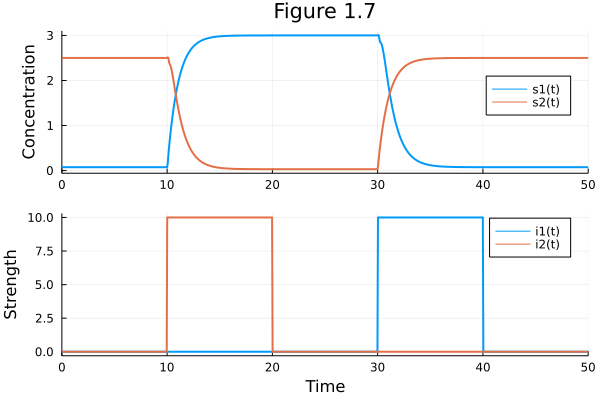

In [9]:
pl0107a = plot(sol, legend=:right, xlabel = "", ylabel="Concentration", title="Figure 1.7")

# Tracking intermediate variables
pl0107b = plot(sol, vars = [i1, i2], xlabel="Time", ylabel="Strength")

plot(pl0107a, pl0107b, layout=(2, 1))

## Fig 1.09 Hodgkin-Huxley model

In [10]:
using DifferentialEquations
using ModelingToolkit
using Plots
Plots.gr(lw=2, fmt=:png)

Plots.GRBackend()

In [11]:
# Convenience functions
hill(x, k) = x / (x + k)
hill(x, k, n) = hill(x^n, k^n)
exprel(x) = x / expm1(x)

exprel (generic function with 1 method)

In [12]:
# Build the model

@parameters E_N E_K E_LEAK G_N_BAR G_K_BAR G_LEAK C_M
@variables t v(t) m(t) h(t) n(t) mα(t) mβ(t) hα(t) hβ(t) nα(t) nβ(t) iNa(t) iK(t) iLeak(t) iStim(t)

D = Differential(t)

(::Differential) (generic function with 2 methods)

In [13]:
# Time-dependent force
get_istim(t) = ifelse(20<=t<=21, -6.8, ifelse(60<=t<=61, -7.0, 0.0))

@register get_istim(t)

In [14]:
@named hhSys = ODESystem(
   [mα  ~ exprel(-0.10 * (v + 35)),
    mβ  ~ 4.0 * exp(-(v + 60) / 18.0),
    hα  ~ 0.07 * exp(- ( v + 60) / 20),
    hβ  ~ 1 / (exp(-(v+30)/10) + 1),
    nα  ~ 0.1 * exprel(-0.1 * (v+50)),
    nβ  ~ 0.125 * exp( -(v+60) / 80),
    iNa ~ G_N_BAR * (v - E_N) * (m^3) * h,
    iK  ~ G_K_BAR * (v - E_K) * (n^4),
    iLeak ~ G_LEAK * (v - E_LEAK),
    iStim ~ get_istim(t),
    D(v) ~ -(iNa + iK + iLeak + iStim) / C_M,
    D(m) ~ -(mα + mβ) * m + mα,
    D(h) ~ -(hα + hβ) * h + hα,
    D(n) ~ -(nα + nβ) * n + nα]
)

Model hhSys with 14 equations
States (14):
  v(t)
  m(t)
  h(t)
  n(t)
  mα(t)
  mβ(t)
⋮
Parameters (7):
  E_N
  G_N_BAR
  E_K
  G_K_BAR
  E_LEAK
  G_LEAK
⋮

In [15]:
hhSys = structural_simplify(hhSys)

Model hhSys with 4 equations
States (4):
  v(t)
  m(t)
  h(t)
  n(t)
Parameters (7):
  E_N
  G_N_BAR
  E_K
  G_K_BAR
  E_LEAK
  G_LEAK
⋮
Incidence matrix:sparse([1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 1, 3, 1, 4], [1, 2, 3, 4, 5, 5, 5, 5, 6, 6, 7, 7, 8, 8], Num[×, ×, ×, ×, ×, ×, ×, ×, ×, ×, ×, ×, ×, ×], 4, 8)

In [16]:
params = [  E_N => 55.0,       # Reversal potential of Na (mV)
            E_K => -72.0,      # Reversal potential of K (mV)
            E_LEAK => -49.0,   # Reversal potential of leaky channels (mV)
            G_N_BAR => 120.0,  # Max. Na channel conductance (mS/cm^2)
            G_K_BAR => 36.0,   # Max. K channel conductance (mS/cm^2)
            G_LEAK => 0.30,    # Max. leak channel conductance (mS/cm^2)
            C_M => 1.0]        # membrane capacitance (uF/cm^2)

u0 = [v => -59.8977, m => 0.0536, h => 0.5925, n => 0.3192]
tend = 100.0

100.0

In [17]:
prob = ODEProblem(hhSys, u0, tend, params, jac=true)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 100.0)
u0: 4-element Vector{Float64}:
 -59.8977
   0.0536
   0.5925
   0.3192

In [18]:
sol = solve(prob, tstops=[20, 60])

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 201-element Vector{Float64}:
   0.0
   0.28649552814013246
   0.6282062901208554
   1.129278055899384
   1.7885396222404344
   2.728033408123967
   3.822572415062088
   4.838119173564754
   5.700042645198015
   6.449974946612389
   7.151326501296179
   7.850497467823436
   8.569189447525273
   ⋮
  79.93255405964989
  80.75644465757689
  81.675810816552
  82.74094410541343
  84.0857071034443
  86.2288391101619
  87.51709058500892
  89.72458395527511
  91.83175296168837
  94.8883386718368
  97.14069699975911
 100.0
u: 201-element Vector{Vector{Float64}}:
 [-59.8977, 0.0536, 0.5925, 0.3192]
 [-59.896772589630615, 0.05358478178533264, 0.592500685682472, 0.3192027439091019]
 [-59.89607841753646, 0.05358354985039717, 0.5925003853539127, 0.31920656870931335]
 [-59.895380703810375, 0.0535873207053195, 0.5924985631919883, 0.3192127047922289]
 [-59.89482710337

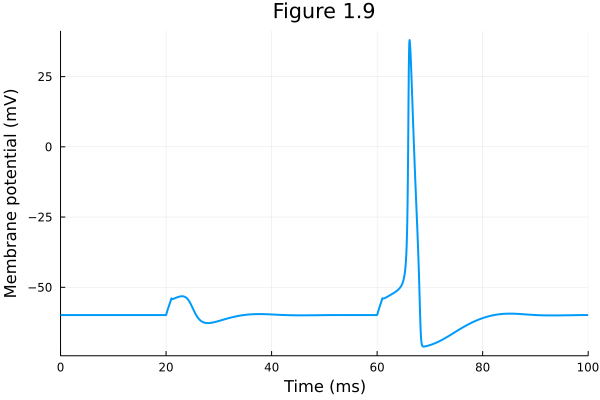

In [19]:
plot(sol, vars=(t, v),
     ylabel="Membrane potential (mV)", xlabel="Time (ms)", 
     legend=false, title="Figure 1.9")

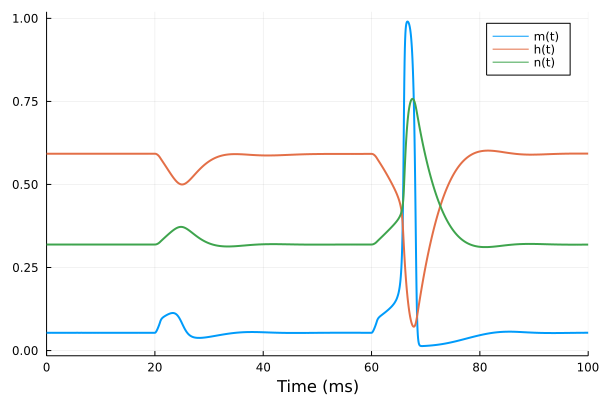

In [20]:
plot(sol, vars = [m, h, n], xlabel="Time (ms)")

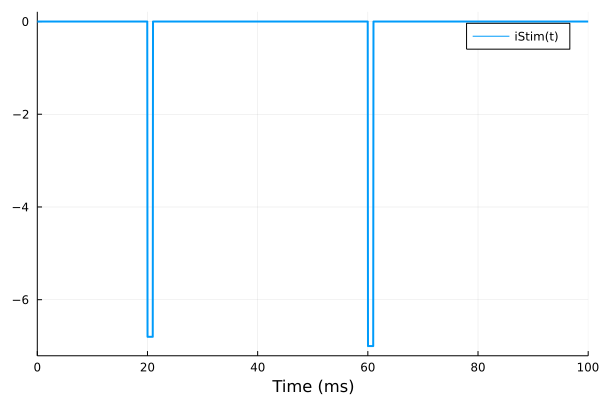

In [21]:
plot(sol, vars = [iStim], xlabel="Time (ms)")